# Managerial Accounting ML

The aim of this notebook is to explore the application of various Machine Learning tools in relation to the Managerial Account dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('../data/double_entry_managerial_accounting.csv')
df['Date'] = pd.to_datetime(df['Date'])

## Regression

In [5]:
classification_models = []

## Classification

### Account

In [6]:
df_classify = df.copy()
label_encoders = {}
for column in ['Transaction Type', 'Category', 'Department', 'Project']:
    le = LabelEncoder()
    df_classify[column] = le.fit_transform(df_classify[column])
    label_encoders[column] = le

features = ['Transaction Type', 'Category', 'Department', 'Project', 'Credit', 'Debit', 'Account Number']
account_X = df_classify[features]
account_y = df_classify['Account']

account_X_train, account_X_test, account_y_train, account_y_test = train_test_split(account_X, account_y, test_size=0.3, random_state=42)
account_classifiction_model = RandomForestClassifier(random_state=42)

account_classifiction_model.fit(account_X_train, account_y_train)
account_y_pred = account_classifiction_model.predict(account_X_test)
print(classification_report(account_y_test, account_y_pred))
classification_models.append(account_classifiction_model)

                 precision    recall  f1-score   support

  Asset Account       1.00      1.00      1.00      9084
           Cash       1.00      1.00      1.00     29998
Expense Account       1.00      1.00      1.00     11845
Revenue Account       1.00      1.00      1.00      9073

       accuracy                           1.00     60000
      macro avg       1.00      1.00      1.00     60000
   weighted avg       1.00      1.00      1.00     60000



### Transaction Type

In [13]:
df_classify = df.copy()
label_encoders = {}
for column in ['Category', 'Department', 'Project', 'Account', 'Location']:
    le = LabelEncoder()
    df_classify[column] = le.fit_transform(df_classify[column])
    label_encoders[column] = le

features = ['Account Number', 'Category', 'Department', 'Project', 'Location', 'Credit', 'Debit']
transaction_X = df_classify[features]
transaction_y = df_classify['Transaction Type']

transaction_X_train, transaction_X_test, transaction_y_train, transaction_y_test = train_test_split(transaction_X, transaction_y, test_size=0.3, random_state=42)
transaction_type_classification_model = RandomForestClassifier(random_state=42)
transaction_type_classification_model.fit(transaction_X_train, transaction_y_train)

transaction_y_pred = transaction_type_classification_model.predict(transaction_X_test)
print(classification_report(transaction_y_test, transaction_y_pred))
classification_models.append(transaction_type_classification_model)

                   precision    recall  f1-score   support

   Asset Purchase       1.00      1.00      1.00     12230
          Expense       1.00      1.00      1.00     23659
Liability Payment       1.00      1.00      1.00      6017
          Revenue       1.00      1.00      1.00     18094

         accuracy                           1.00     60000
        macro avg       1.00      1.00      1.00     60000
     weighted avg       1.00      1.00      1.00     60000



### Department

In [8]:
df_classify = df.copy()
label_encoders = {}
for column in ['Transaction Type', 'Category', 'Project', 'Account']:
    le = LabelEncoder()
    df_classify[column] = le.fit_transform(df_classify[column])
    label_encoders[column] = le

department_encoder = LabelEncoder()
df_classify['Department'] = department_encoder.fit_transform(df_classify['Department'])

features = ['Transaction Type', 'Category', 'Project', 'Account', 'Credit', 'Debit', 'Account Number']
department_X = df_classify[features]
department_y = df_classify['Department']

department_X_train, department_X_test, department_y_train, department_y_test = train_test_split(department_X, department_y, test_size=0.3, random_state=42)
department_classification_model = RandomForestClassifier(random_state=42)
department_classification_model.fit(department_X_train, department_y_train)

department_y_pred = department_classification_model.predict(department_X_test)
print(classification_report(department_y_test, department_y_pred, target_names=department_encoder.classes_))
classification_models.append(department_classification_model)

              precision    recall  f1-score   support

     Finance       0.25      0.25      0.25     14993
          HR       0.25      0.25      0.25     15064
   Marketing       0.25      0.25      0.25     14838
       Sales       0.25      0.24      0.25     15105

    accuracy                           0.25     60000
   macro avg       0.25      0.25      0.25     60000
weighted avg       0.25      0.25      0.25     60000



### Project

In [9]:
df_classify = df.copy()
label_encoders = {}
for column in ['Transaction Type', 'Category', 'Department', 'Account']:
    le = LabelEncoder()
    df_classify[column] = le.fit_transform(df_classify[column])
    label_encoders[column] = le

project_encoder = LabelEncoder()
df_classify['Project'] = project_encoder.fit_transform(df_classify['Project'])

features = ['Transaction Type', 'Category', 'Department', 'Account', 'Credit', 'Debit', 'Account Number']
project_X = df_classify[features]
project_y = df_classify['Project']

project_X_train, project_X_test, project_y_train, project_y_test = train_test_split(project_X, project_y, test_size=0.3, random_state=42)
project_classification_model = RandomForestClassifier(random_state=42)
project_classification_model.fit(project_X_train, project_y_train)

project_y_pred = project_classification_model.predict(project_X_test)
print(classification_report(project_y_test, project_y_pred, target_names=project_encoder.classes_))
classification_models.append(project_classification_model)

              precision    recall  f1-score   support

   Project A       0.25      0.25      0.25     14976
   Project B       0.25      0.25      0.25     14862
   Project C       0.25      0.25      0.25     14991
   Project D       0.26      0.25      0.25     15171

    accuracy                           0.25     60000
   macro avg       0.25      0.25      0.25     60000
weighted avg       0.25      0.25      0.25     60000



### Category

In [10]:
df_classify = df.copy()
label_encoders = {}
for column in ['Transaction Type', 'Department', 'Project', 'Account']:
    le = LabelEncoder()
    df_classify[column] = le.fit_transform(df_classify[column])
    label_encoders[column] = le

category_encoder = LabelEncoder()
df_classify['Category'] = category_encoder.fit_transform(df_classify['Category'])

features = ['Transaction Type', 'Department', 'Project', 'Account', 'Credit', 'Debit', 'Account Number']
category_X = df_classify[features]
category_y = df_classify['Category']

category_X_train, category_X_test, category_y_train, category_y_test = train_test_split(category_X, category_y, test_size=0.3, random_state=42)
category_classification_model = RandomForestClassifier(random_state=42)
category_classification_model.fit(category_X_train, category_y_train)

category_y_pred = category_classification_model.predict(category_X_test)
print(classification_report(category_y_test, category_y_pred, target_names=category_encoder.classes_))
classification_models.append(category_classification_model)

                 precision    recall  f1-score   support

         Assets       0.50      0.52      0.51      9199
          Loans       0.49      0.48      0.49      9048
  Product Sales       0.33      0.34      0.33      6048
           Rent       0.24      0.25      0.24      5876
      Royalties       0.32      0.32      0.32      6028
       Salaries       0.25      0.26      0.26      5849
Service Revenue       0.33      0.33      0.33      6018
       Supplies       0.25      0.24      0.25      5998
      Utilities       0.26      0.25      0.25      5936

       accuracy                           0.35     60000
      macro avg       0.33      0.33      0.33     60000
   weighted avg       0.35      0.35      0.35     60000



## Anomaly Detection
Having trained the classification models, we can leverage them to detect potentially anomalous classifications in the data. In this implementation, we create a dataframe of transactions for which the classifification model is unable to assign a clear class with high confidence. If the highest probability for every class within a transaction is below a certain threshold, it is automatically flagged as an unusual transaction. Such transactions are flagged as potentially anomalous for further investigation.

In [16]:
#Example with category classification model
probabilities = transaction_type_classification_model.predict_proba(transaction_X_test)
threshold = 0.8 #30% Dependent on business requirements and classification model accuracy

suspicious_indices = []
for i, probs in enumerate(probabilities):
    if max(probs) < threshold:
        suspicious_indices.append(i)

df_suspicious = category_X_test.iloc[suspicious_indices]
print("Suspicious Transactions:")
df_suspicious = df.loc[df_suspicious.index]
df_suspicious

Suspicious Transactions:


,Date,Account Number,Transaction Type,Category,Department,Project,Location,Reference Number,Account,Credit,Debit
101072,2021-02-02 10:17:02,75173,Revenue,Royalties,HR,Project A,Houston,1300262,Revenue Account,119.83,0.00
150077,2021-08-31 11:13:34,78219,Revenue,Royalties,Finance,Project C,Chicago,5126832,Cash,0.00,777.25
125749,2022-06-11 22:22:52,50067,Revenue,Royalties,Finance,Project D,Los Angeles,3036491,Cash,0.00,342.94
136303,2020-06-27 08:29:09,56241,Revenue,Royalties,Marketing,Project D,Los Angeles,1362907,Cash,0.00,557.31
106920,2020-12-14 21:49:12,76590,Revenue,Royalties,Sales,Project A,New York,6566380,Revenue Account,288.48,0.00
...,...,...,...,...,...,...,...,...,...,...,...
107655,2021-05-18 17:11:21,73619,Revenue,Royalties,Marketing,Project D,Chicago,8371214,Cash,0.00,963.69
146614,2020-02-01 17:30:20,66154,Revenue,Royalties,HR,Project C,Chicago,3758061,Revenue Account,949.95,0.00
112865,2021-09-14 13:18:09,90629,Revenue,Royalties,Finance,Project A,Los Angeles,6577255,Cash,0.00,381.53
135267,2022-02-08 00:29:40,61892,Revenue,Royalties,Finance,Project D,Los Angeles,8473031,Cash,0.00,448.49


## Clustering
Clustering can provide deeper insights into data distribution and feature importance.

### Account

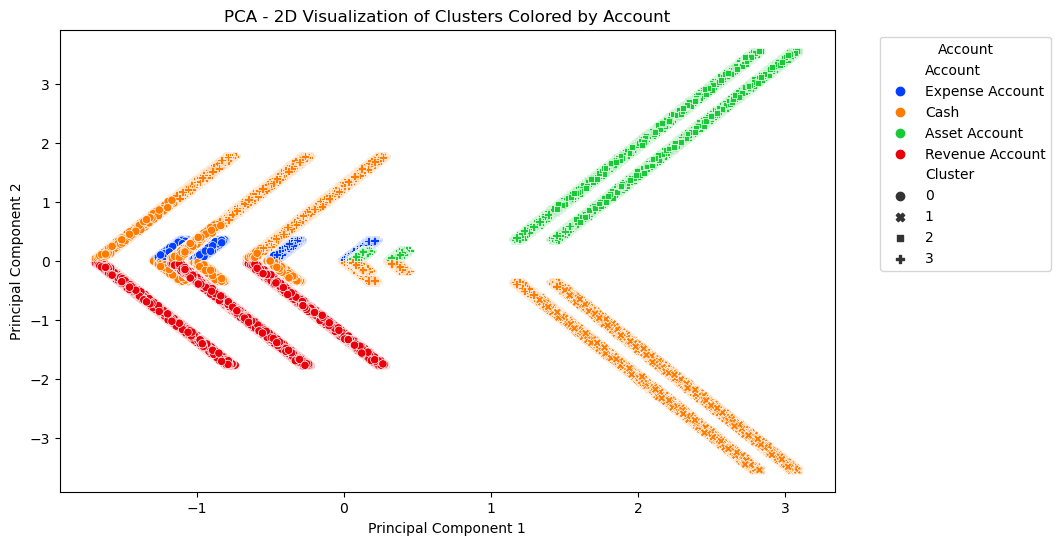

In [71]:
df_cluster = df.copy()
df_cluster = df_cluster.drop('Date', axis=1)

label_encoders = {}
for column in df_cluster.select_dtypes(include=['object']).columns:
    if column != 'Account':
        le = LabelEncoder()
        df_cluster[column] = le.fit_transform(df_cluster[column])
        label_encoders[column] = le

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster.drop('Account', axis=1))

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

kmeans = KMeans(n_clusters=df.Account.nunique(), random_state=42)
kmeans.fit(pca_features)
df_cluster['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df_cluster['Account'], palette='bright', style=df_cluster['Cluster'])
plt.title('PCA - 2D Visualization of Clusters Colored by Account')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Account', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Department

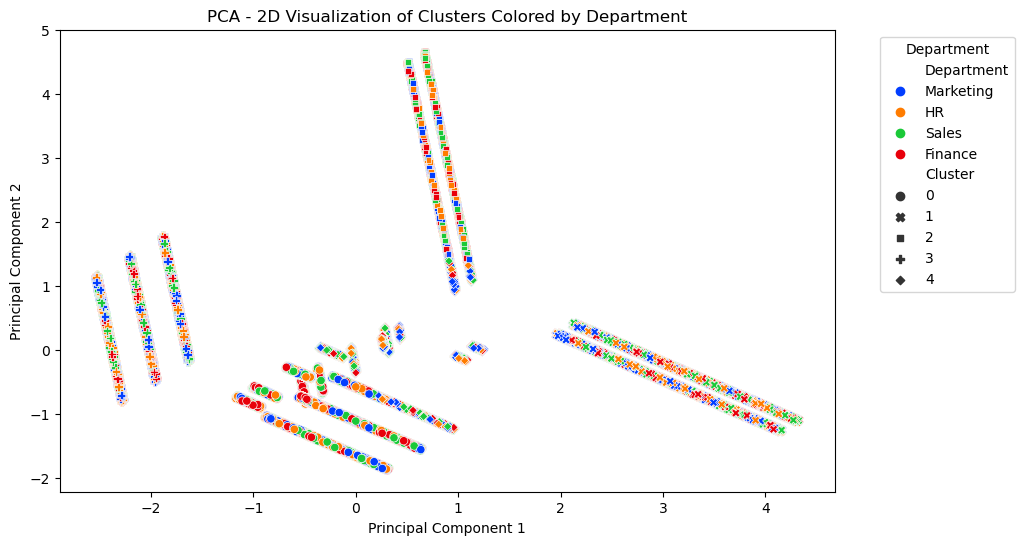

In [26]:
df_cluster = df.copy()
df_cluster = df_cluster.drop('Date', axis=1)

label_encoders = {}
for column in df_cluster.select_dtypes(include=['object']).columns:
    if column != 'Department':
        le = LabelEncoder()
        df_cluster[column] = le.fit_transform(df_cluster[column])
        label_encoders[column] = le

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster.drop('Department', axis=1))

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_features)
df_cluster['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df_cluster['Department'], palette='bright', style=df_cluster['Cluster'])
plt.title('PCA - 2D Visualization of Clusters Colored by Department')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Project

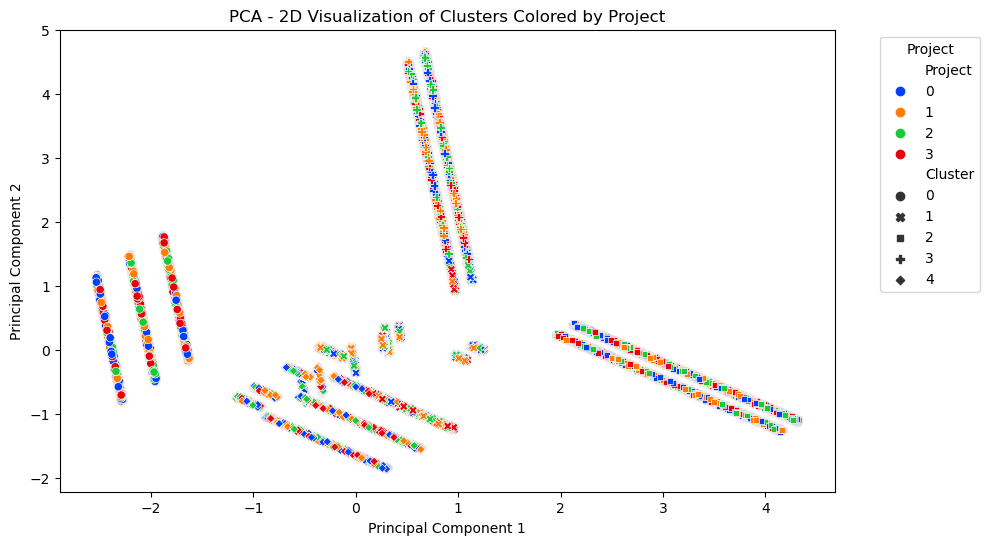

In [29]:
df_cluster = df.copy()
df_cluster = df_cluster.drop('Date', axis=1)

label_encoders = {}
for column in df_cluster.select_dtypes(include=['object']).columns:
    if column != 'Project':
        le = LabelEncoder()
        df_cluster[column] = le.fit_transform(df_cluster[column])
        label_encoders[column] = le

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster.drop('Project', axis=1))

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_features)
df_cluster['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df_cluster['Project'], palette='bright', style=df_cluster['Cluster'])
plt.title('PCA - 2D Visualization of Clusters Colored by Project')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Project', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Location

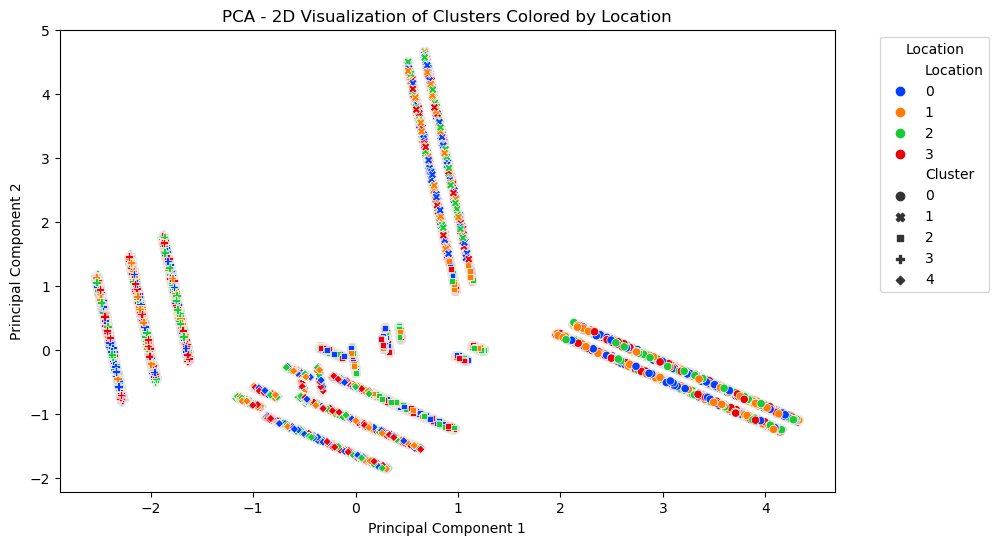

In [30]:
df_cluster = df.copy()
df_cluster = df_cluster.drop('Date', axis=1)

label_encoders = {}
for column in df_cluster.select_dtypes(include=['object']).columns:
    if column != 'Location':
        le = LabelEncoder()
        df_cluster[column] = le.fit_transform(df_cluster[column])
        label_encoders[column] = le

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster.drop('Location', axis=1))

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_features)
df_cluster['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df_cluster['Location'], palette='bright', style=df_cluster['Cluster'])
plt.title('PCA - 2D Visualization of Clusters Colored by Location')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Interpretation**: The accounts follow rigid accounting rules while all other features are normally distributed per original dataset. Thus, the accounts are the main driver of the clustering and other feature clusters provide no insights.